In [225]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import openpyxl


In [226]:
# 1 simulacion de datos
np.random.seed(42)
n_components = 10000
mean_weight = 50
std_weight = 2
weights = np.random.normal(mean_weight, std_weight, n_components)
weights

array([50.99342831, 49.7234714 , 51.29537708, ..., 48.58936655,
       50.99153115, 51.28877691])

In [227]:
max_weights = np.max(weights)
min_weights = np.min(weights)
print(f"El peso maximo es {max_weights:.2f}")
print(f"El peso minimo es {min_weights:.2f}")

El peso maximo es 57.85
El peso minimo es 42.16


In [228]:
defect_probability = 0.02
defects = np.random.choice([0, 1], size = n_components, p=[1 - defect_probability, defect_probability])

data = pd.DataFrame({'weight': weights, 'Defect': defects})
data

,weight,Defect
0,50.993428,0
1,49.723471,0
2,51.295377,0
3,53.046060,0
4,49.531693,0
...,...,...
9995,52.602204,0
9996,46.003310,0
9997,48.589367,0
9998,50.991531,0


In [229]:
# contar defectos
count_zero = (data['Defect'] == 0).sum()  
count_one = (data['Defect'] == 1).sum()  

n_components = len(data)  

percentage_zero = (count_zero / n_components) * 100
percentage_one = (count_one / n_components) * 100

print(f"Cantidad de componentes sin defecto (0): {count_zero}")
print(f"Cantidad de componentes con defecto (1): {count_one}")
print(f"Porcentaje de componentes sin defecto: {percentage_zero:.2f}%")
print(f"Porcentaje de componentes con defecto: {percentage_one:.2f}%")


Cantidad de componentes sin defecto (0): 9774
Cantidad de componentes con defecto (1): 226
Porcentaje de componentes sin defecto: 97.74%
Porcentaje de componentes con defecto: 2.26%


In [230]:
print(f"Estadisticas descriptivas ")
print(data.describe())

Estadisticas descriptivas 
             weight        Defect
count  10000.000000  10000.000000
mean      49.995728      0.022600
std        2.006925      0.148632
min       42.155199      0.000000
25%       48.654819      0.000000
50%       49.994810      0.000000
75%       51.342162      0.000000
max       57.852475      1.000000


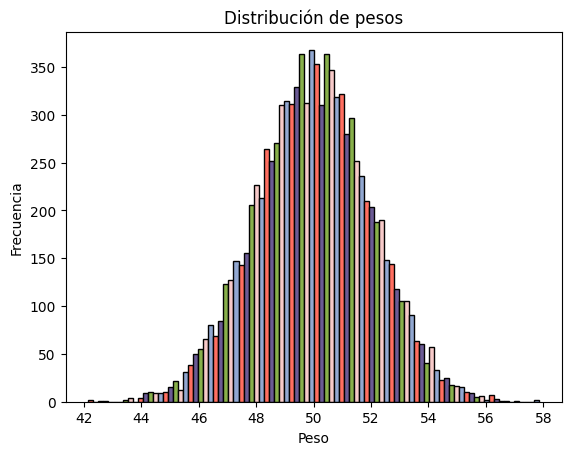

In [231]:
n, bins, patches = plt.hist(data['weight'], bins=90, edgecolor='black')
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']  
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i % len(colors)])

plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Distribución de pesos')
plt.show()

In [232]:
weights_df = pd.DataFrame(weights, columns=['Weights'])
defects_df = pd.DataFrame(weights, columns=['Defect'])
sample2 = np.array([np.random.choice(weights, size=30, replace=False) for _ in range(1000)])

combined_samples = sample2.flatten()
combined_samples_df = pd.DataFrame(combined_samples, columns=["30 MIL Samples"])

final_df = pd.concat([weights_df, defects_df, combined_samples_df], axis=1)

final_df.to_excel('final.xlsx', index=False)

print(f"Los datos se han guardado correctamente en final.xlsx")

Los datos se han guardado correctamente en final.xlsx


In [233]:
print(f"{final_df.describe()}")

            Weights        Defect  30 MIL Samples
count  10000.000000  10000.000000    30000.000000
mean      49.995728     49.995728       50.002318
std        2.006925      2.006925        2.006237
min       42.155199     42.155199       42.155199
25%       48.654819     48.654819       48.654189
50%       49.994810     49.994810       50.006106
75%       51.342162     51.342162       51.363323
max       57.852475     57.852475       57.852475


In [234]:
def full_stats(df):
    return df.describe().T.assign(
        skew=df.skew(),
        kurtosis=df.kurtosis(),
        variance=df.var(),
        unique=df.nunique(),  # Cambiar unique() por nunique()
    )

print(full_stats(final_df))


                  count       mean       std        min        25%        50%  \
Weights         10000.0  49.995728  2.006925  42.155199  48.654819  49.994810   
Defect          10000.0  49.995728  2.006925  42.155199  48.654819  49.994810   
30 MIL Samples  30000.0  50.002318  2.006237  42.155199  48.654189  50.006106   

                      75%        max      skew  kurtosis  variance  unique  
Weights         51.342162  57.852475  0.001964  0.027093  4.027747   10000  
Defect          51.342162  57.852475  0.001964  0.027093  4.027747   10000  
30 MIL Samples  51.363323  57.852475 -0.003285  0.020088  4.024985    9479  


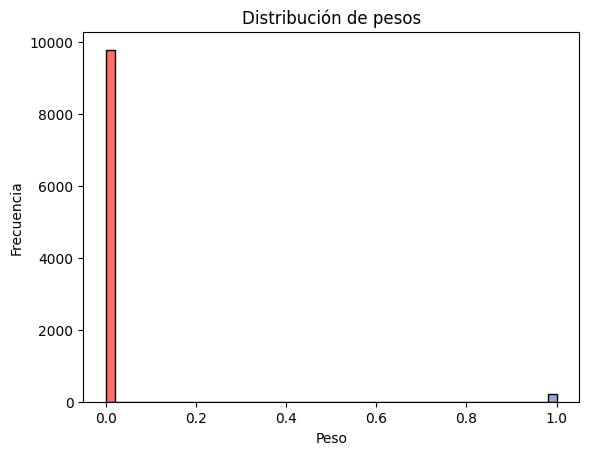

In [235]:
n, bins, patches = plt.hist(data['Defect'], bins=50, edgecolor='black')
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']  
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i % len(colors)])

plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.title('Distribución de pesos')
plt.show()

In [236]:
sample = [np.mean(np.random.choice(weights, size=30, replace=False)) for i in range(1000)]

sample_means = [np.mean(sample3) for sample3 in sample]

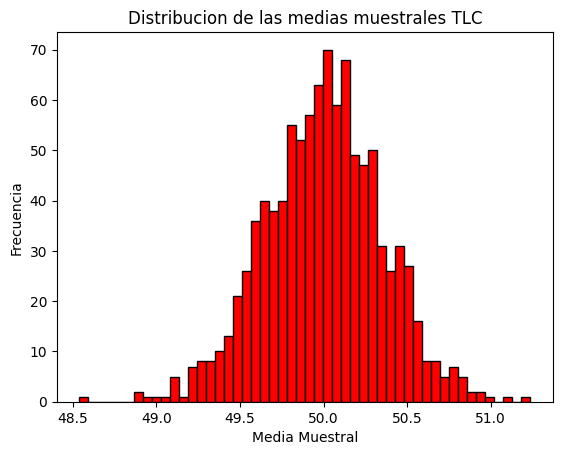

In [237]:
plt.hist(sample_means, bins=50, color='red', edgecolor='black')
plt.title('Distribucion de las medias muestrales TLC')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.show()

In [238]:
df_sample2 = pd.DataFrame(sample2)

df_sample2.to_excel('samples_1000x30.xlsx', index=False, header=False)

print(f"Las 1000 columnas de 30 datos han sido guardadas en 'samples_1000x30.xlsx")

Las 1000 columnas de 30 datos han sido guardadas en 'samples_1000x30.xlsx


In [239]:
df_sample5 = pd.DataFrame(sample_means)

df_sample5.to_excel('samples_1000x30means.xlsx',index=False, header=False)

print(f"Las 1000 columnas de 30 datos han sido guardadas en 'samples_1000x30means.xlsx")

Las 1000 columnas de 30 datos han sido guardadas en 'samples_1000x30means.xlsx


In [240]:
confidence_level = 0.95
sample = np.random.choice(weights, size=30, replace=False)
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)


In [241]:
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=len(sample) - 1) * (sample_std / np.sqrt(len(sample)))
print(f"Media muestral : {sample_mean:.2f}, Intervalo de confianza al 95% : [{sample_mean - margin_of_error:.2f}, {sample_mean + margin_of_error:.2f}]")


Media muestral : 49.41, Intervalo de confianza al 95% : [48.66, 50.15]


In [242]:
prob_x_greater_52 = 1 - stats.norm.cdf(52, loc=mean_weight, scale=std_dev_weight)
print(f"Probabilidad de que un componente pese más de 52 g: {prob_x_greater_52:.4f}")


NameError: name 'std_dev_weight' is not defined